In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Bupa\Bupa_AL_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6
0,85.0,92,45.0,27.0,31.0,0.0
1,85.0,64,59.0,32.0,23.0,0.0
2,86.0,54,NaN,16.0,NaN,NaN
3,91.0,78,34.0,NaN,NaN,NaN
4,98.0,55,13.0,17.0,17.0,0.0
...,...,...,...,...,...,...
340,91.0,54,25.0,NaN,NaN,NaN
341,89.0,48,32.0,22.0,14.0,4.0
342,85.0,52,22.0,23.0,34.0,4.0
343,95.0,93,21.0,27.0,47.0,6.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	22
int64		column 2	0
float64		column 3	68
float64		column 4	66
float64		column 5	134
float64		column 6	112


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6
count,323.000000,345.000000,277.000000,279.000000,211.000000,233.000000
mean,90.191950,69.869565,29.765343,24.555556,37.246445,3.334764
std,4.524639,18.347670,17.367485,10.440115,38.480990,3.150594
min,65.000000,23.000000,4.000000,5.000000,5.000000,0.000000
25%,87.000000,57.000000,19.000000,19.000000,15.000000,0.500000
50%,90.000000,67.000000,26.000000,22.000000,23.000000,3.000000
75%,93.000000,80.000000,34.000000,27.000000,44.000000,5.000000
max,103.000000,138.000000,154.000000,82.000000,297.000000,16.000000


<AxesSubplot:>

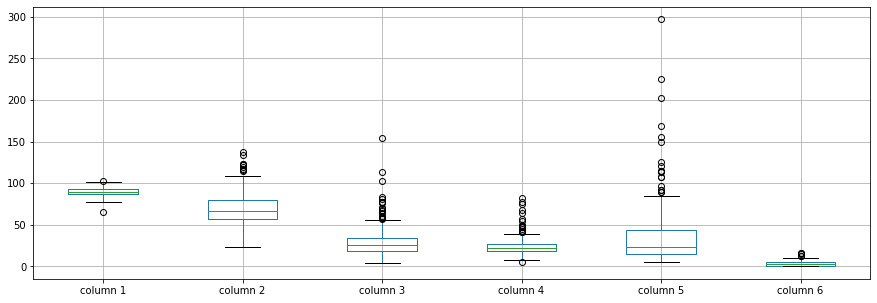

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    90.191950
column 2    69.869565
column 3    29.765343
column 4    24.555556
column 5    37.246445
column 6     3.334764
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6
column 1,1.000000,0.045319,0.099902,0.136210,0.099546,0.295279
column 2,0.045319,1.000000,0.055097,0.080027,0.020109,0.045965
column 3,0.099902,0.055097,1.000000,0.748007,0.459434,0.162638
column 4,0.136210,0.080027,0.748007,1.000000,0.473572,0.221188
column 5,0.099546,0.020109,0.459434,0.473572,1.000000,0.287875
column 6,0.295279,0.045965,0.162638,0.221188,0.287875,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [6,6+38,6+38+38,6+38+38+38,6+38+38+38+38,6+38+38+38,6+38+38,6+38,6], vae_layer = False, seed = 380)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [6]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 237.39545331682478
Epoch: 1 , loss: 237.5873558407738
Epoch: 2 , loss: 237.82672627766928
Epoch: 3 , loss: 237.2096920921689
Epoch: 4 , loss: 236.0373738606771
Epoch: 5 , loss: 238.82452392578125
Epoch: 6 , loss: 237.73162551153274
Epoch: 7 , loss: 236.80227806454613
Epoch: 8 , loss: 237.32706124441964
Epoch: 9 , loss: 238.21136837913878
Epoch: 10 , loss: 238.36158389136904
Epoch: 11 , loss: 237.37890842982702
Epoch: 12 , loss: 238.7199445452009
Epoch: 13 , loss: 238.93342662992933
Epoch: 14 , loss: 236.01116362072173
Epoch: 15 , loss: 236.9968465169271
Epoch: 16 , loss: 238.46954418364027
Epoch: 17 , loss: 238.03539530436197
Epoch: 18 , loss: 238.0534951346261
Epoch: 19 , loss: 237.20461091541108
Epoch: 20 , loss: 238.7474568684896
Epoch: 21 , loss: 237.80875723702567
Epoch: 22 , loss: 237.3266303652809
Epoch: 23 , loss: 237.29136948358445
Epoch: 24 , loss: 236.41166541689918
Epoch: 25 , loss: 234.2890

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(345, 6)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    90.000000
column 2    47.000000
column 3    28.000000
column 4     0.042040
column 5     0.040730
column 6     0.042088
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Bupa.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6
0,0.0,0,0.000000,0.000000,0.000000,0.000000
1,0.0,0,0.000000,0.000000,0.000000,0.000000
2,0.0,0,-32.947909,0.000000,-53.949714,0.052046
3,0.0,0,0.000000,-23.956096,-35.957651,0.043636
4,0.0,0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
340,0.0,0,0.000000,-21.950737,-34.952631,-3.951731
341,0.0,0,0.000000,0.000000,0.000000,0.000000
342,0.0,0,0.000000,0.000000,0.000000,0.000000
343,0.0,0,0.000000,0.000000,0.000000,0.000000



Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

882.2219591711483

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

2519.762091944396

In [18]:
NRMS=numerator/denominator
NRMS


0.35012113325761407

In [19]:
new_df.iloc[66,:]

column 1    86.0
column 2    54.0
column 3    20.0
column 4    21.0
column 5    16.0
column 6     2.0
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6
0,85.0,92,45.000000,27.000000,31.000000,0.000000
1,85.0,64,59.000000,32.000000,23.000000,0.000000
2,86.0,54,14.293367,16.000000,18.868593,1.615984
3,91.0,78,34.000000,13.358221,17.484917,1.617923
4,98.0,55,13.000000,17.000000,17.000000,0.000000
...,...,...,...,...,...,...
340,91.0,54,25.000000,68.751282,87.756462,7.900461
341,89.0,48,32.000000,22.000000,14.000000,4.000000
342,85.0,52,22.000000,23.000000,34.000000,4.000000
343,95.0,93,21.000000,27.000000,47.000000,6.000000


In [21]:
imputations[-1].to_excel("Bupa_AL_20(imp).xlsx", index=False, header=False)